In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [12]:
fp = "G:\My Drive\INVESTIGACION\Cartografia/Barrios.shp"
map_df = gpd.read_file(fp)

In [13]:
map_df.head()

,OBJECTID,ID_BARRIO,S_NOMBARRI,ID_MPIO,ID_CONBARR,ID_COMUNA,geometry
0,1,14,San Jose,266,052660000014,00,"POLYGON ((-75.58064 6.16393, -75.58057 6.16369..."
1,2,11,La Paz,266,052660000011,00,"POLYGON ((-75.58988 6.16203, -75.59002 6.16135..."
2,3,15,Loma de Las Brujas,266,052660000015,00,"POLYGON ((-75.57953 6.16595, -75.57946 6.16594..."
3,4,10,Primavera,266,052660000010,00,"POLYGON ((-75.59583 6.16409, -75.59594 6.16391..."
4,5,17,El Chocho,266,052660000017,00,"POLYGON ((-75.56484 6.16712, -75.56477 6.16712..."


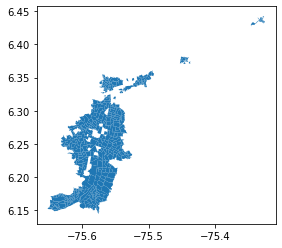

In [14]:
map_df.plot();

In [18]:
df = pd.read_csv('barrios_csv.csv', header=0)

df.head()

,S_NOMBARRI,SHAPE_Leng,SHAPE_Area
0,San Jose,3047.058332,367515.2776
1,La Paz,2780.181666,337169.8578
2,Loma de Las Brujas,2660.995035,286156.5117
3,Primavera,1929.741489,231351.4507
4,El Chocho,2380.625464,256830.2183


In [19]:
df = df[['S_NOMBARRI','SHAPE_Leng','SHAPE_Area']]
score = df.rename(index=str, columns={"S_NOMBARRI": "barrio",
                                      "SHAPE_Leng": "perimetro",
                                      "SHAPE_Area": "area"})
score.head()

,barrio,perimetro,area
0,San Jose,3047.058332,367515.2776
1,La Paz,2780.181666,337169.8578
2,Loma de Las Brujas,2660.995035,286156.5117
3,Primavera,1929.741489,231351.4507
4,El Chocho,2380.625464,256830.2183


In [20]:
merged = map_df.set_index('S_NOMBARRI').join(score.set_index('barrio'))
merged.head()

,OBJECTID,ID_BARRIO,ID_MPIO,ID_CONBARR,ID_COMUNA,geometry,perimetro,area
19 de Abril,425,44,360,053600000344,03,"POLYGON ((-75.63317 6.17547, -75.63302 6.17544...",1826.818097,123491.74220
Acevedo,487,02,088,050880001002,10,"POLYGON ((-75.55255 6.31210, -75.55251 6.31209...",1393.438069,66454.74593
Aguas Calientes,273,04,079,050790000004,00,"POLYGON ((-75.32761 6.43625, -75.32757 6.43610...",1152.228281,52530.21907
Alcala,34,23,266,052660000023,00,"POLYGON ((-75.58962 6.17209, -75.58947 6.17200...",2105.730272,279923.56470
Alcalá,482,02,088,050880000902,09,"POLYGON ((-75.53734 6.33153, -75.53742 6.33149...",1420.320662,51656.32038


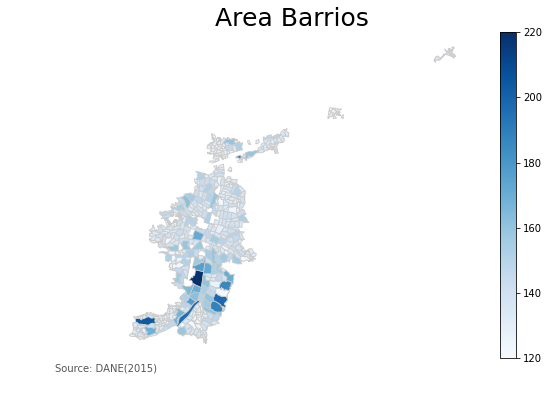

In [21]:
variable = 'area'
vmin, vmax = 120, 220
fig, ax = plt.subplots(1, figsize=(10, 6))
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('Area Barrios', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})
ax.annotate('Source: DANE(2015)',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)


fig.savefig('testmap.png', dpi=300)
